In [2]:
import pandas as pd
from pandas_profiling import ProfileReport    #(To generate Univariate Analysis)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy as sp

pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns", None)
pd.set_option('mode.chained_assignment', None)

import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv')
print('Data Shape:', data.shape)
data.head()
data.tail(10)


Data Shape: (99003, 15)


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98993,1654565,19,15,1994,8,male,394.0,4538,4144,4501,15088,4435,5961,66,9127
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692
98995,1132164,20,9,1993,10,female,699.0,3611,973,4507,7768,4414,6909,93,859
98996,1668695,24,25,1989,4,female,182.0,2938,1272,6018,17765,5843,11708,175,6057
98997,1458985,28,14,1985,12,female,290.0,2218,1618,4626,10268,4290,4250,336,6018
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


### Total Data Columns Summary

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

### Facebook data have 15 columns and 99003 rows.
### 14 columns have integer value and 1 column has floting value.
### In column Gender (175 enteries) and Tenure (2 enteries) had missed values.

In [10]:
# Analysis of missing value.missing "gender" and "tenure" values are being replaced by mode of gender.

data['gender'].fillna(data['gender'].mode()[0],inplace=True)
data['tenure'].fillna(data['tenure'].mode()[0],inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 99003 non-null  object 
 6   tenure                 99003 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

### Addition of new column to make constructive column

In [11]:
data['mobileTotallikes']=data['mobile_likes']+data['mobile_likes_received']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 99003 non-null  object 
 6   tenure                 99003 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
 15  mo

### Cleaning Data by eliminate outliers

In [12]:
ageOutliers=[]
O_indices=[]
q1=np.percentile(data['age'],25)
q3=np.percentile(data['age'],75)
IQR = (q3-q1)*1.5
ageOutliers=data[((data['age']>q3+IQR) | (data['age'] < q1-IQR))]
O_indices=ageOutliers.index
data1=data.drop(data.index[O_indices])
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94689 entries, 0 to 99002
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 94689 non-null  int64  
 1   age                    94689 non-null  int64  
 2   dob_day                94689 non-null  int64  
 3   dob_year               94689 non-null  int64  
 4   dob_month              94689 non-null  int64  
 5   gender                 94689 non-null  object 
 6   tenure                 94689 non-null  float64
 7   friend_count           94689 non-null  int64  
 8   friendships_initiated  94689 non-null  int64  
 9   likes                  94689 non-null  int64  
 10  likes_received         94689 non-null  int64  
 11  mobile_likes           94689 non-null  int64  
 12  mobile_likes_received  94689 non-null  int64  
 13  www_likes              94689 non-null  int64  
 14  www_likes_received     94689 non-null  int64  
 15  mo

### Age column conerting into Different age groups

In [14]:
#'''Categorically age has been grouped into 
#children, teenagers, youngsters, adolescents, adults and senior citizen 
#based on some assumptions'''

indices=[]
tIndices=[]
yIndices=[]
adIndices=[]
adltIndices=[]
sIndices=[]
for index, row in data1.iterrows():
    if row['age']<=14:
        indices.append(index)
    elif row['age']>14 and row['age']<=19:
        tIndices.append(index)
    elif row['age']>19 and row['age']<=25:
        yIndices.append(index)
    elif row['age']>25 and row['age']<=30:
        adIndices.append(index)
    elif row['age']>30 and row['age']<=60:
        adltIndices.append(index)
    else:
        sIndices.append(index)    

In [19]:
childernData = pd.DataFrame(data1.loc[indices], columns = data1.keys()).reset_index(drop=True)
teenagersData = pd.DataFrame(data1.loc[tIndices], columns = data1.keys()).reset_index(drop=True)
youthData = pd.DataFrame(data1.loc[yIndices], columns = data1.keys()).reset_index(drop=True)
adolescentsData = pd.DataFrame(data1.loc[adIndices], columns = data1.keys()).reset_index(drop=True)
adltsData = pd.DataFrame(data1.loc[adltIndices], columns = data1.keys()).reset_index(drop=True)
sData = pd.DataFrame(data1.loc[sIndices], columns = data1.keys()).reset_index(drop=True)

Text(0.5, 1.0, 'MobileData')

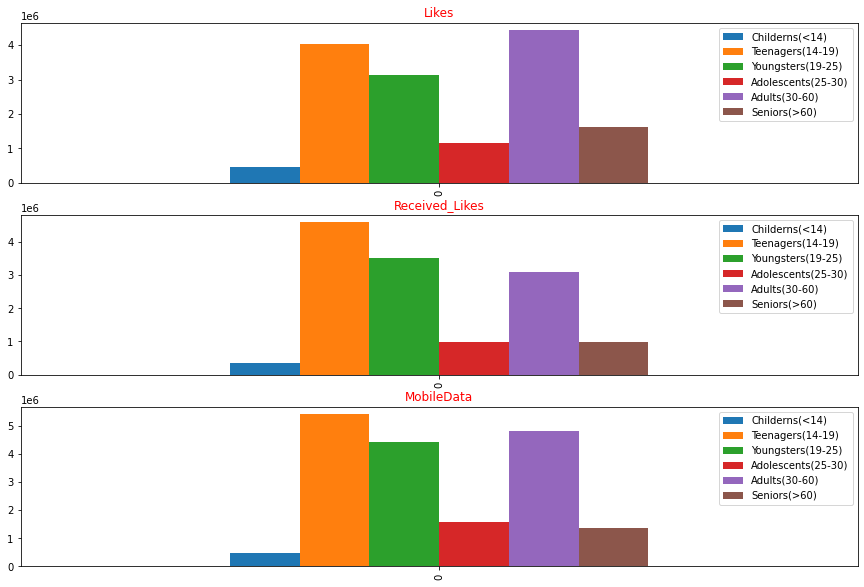

In [20]:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(15,10))
moreLikes = [[childernData.likes.sum(),teenagersData.likes.sum(),youthData.likes.sum(),adolescentsData.likes.sum(),adltsData.likes.sum(),sData.likes.sum()]]
userAgegroup = ['Childerns(<14)','Teenagers(14-19)','Youngsters(19-25)','Adolescents(25-30)','Adults(30-60)','Seniors(>60)']
MorelikesuserData = pd.DataFrame(moreLikes,columns=userAgegroup)
MorelikesuserData.plot.bar(ax=axes[0])
axes[0].set_title('Likes',color='r')
moreReceivedlikes = [[childernData.likes_received.sum(),teenagersData.likes_received.sum(),youthData.likes_received.sum(),adolescentsData.likes_received.sum(),adltsData.likes_received.sum(),sData.likes_received.sum()]]
userAgegroup = ['Childerns(<14)','Teenagers(14-19)','Youngsters(19-25)','Adolescents(25-30)','Adults(30-60)','Seniors(>60)']
MorereceivedlikesuserData = pd.DataFrame(moreReceivedlikes,columns=userAgegroup)
MorereceivedlikesuserData.plot.bar(ax=axes[1])
axes[1].set_title('Received_Likes',color='r')
mobileUsageData = [[childernData.mobileTotallikes.sum(),teenagersData.mobileTotallikes.sum(),youthData.mobileTotallikes.sum(),adolescentsData.mobileTotallikes.sum(),adltsData.mobileTotallikes.sum(),sData.mobileTotallikes.sum()]]
userAgegroup = ['Childerns(<14)','Teenagers(14-19)','Youngsters(19-25)','Adolescents(25-30)','Adults(30-60)','Seniors(>60)']
mobileUsageDataDf = pd.DataFrame(mobileUsageData,columns=userAgegroup)
mobileUsageDataDf.plot.bar(ax=axes[2])
axes[2].set_title('MobileData',color='r')

More likes were being doing by adults and followed by teenagers.
At the same time ,Children’s have been done low likes. More likes received by teenagers and followed by youngsters.
At the same time ,Children’s have been received less likes. Mostly teenagers have been used and very few childerns were used facebook on mobile.

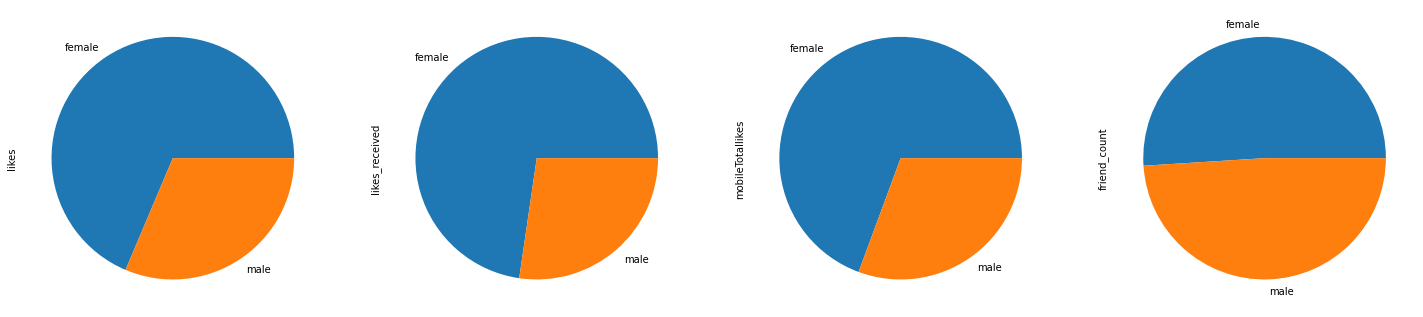

In [35]:
fig,axes=plt.subplots(figsize=(25,22),nrows=1,ncols=4)
doLikes = data1.groupby(['gender'])['likes'].sum()
doLikes.plot.pie(ax=axes[0])
ReceivedLikes = data1.groupby(['gender'])['likes_received'].sum()
ReceivedLikes.plot.pie(ax=axes[1])
MobileUsage=data1.groupby(['gender'])['mobileTotallikes'].sum()
MobileUsage.plot.pie(ax=axes[2])
friendsCount=data1.groupby(['gender'])['friend_count'].sum()
friendsCount.plot.pie(ax=axes[3])

Doing more likes,Receiving more likes,mobile facebook app usage and friend count also more females compare with males. Hence Mostly facebook usage are more females than males.

### Date of Birth Vs Users activeness on Facebook

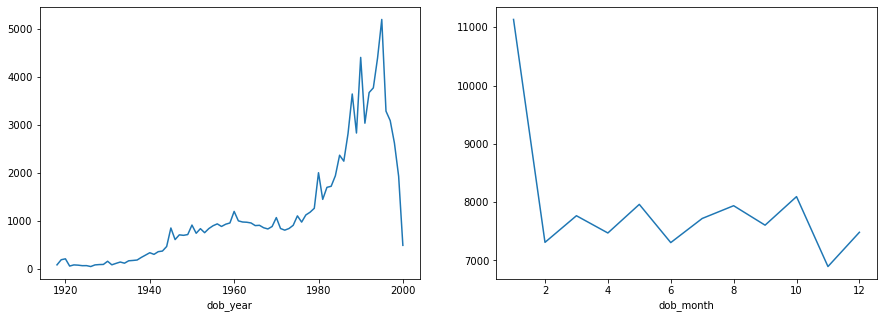

In [29]:
%matplotlib inline
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
data1.groupby(['dob_year'])['userid'].count().plot(ax=axes[0])
data1.groupby(['dob_month'])['userid'].count().plot(ax=axes[1])

As shown in Plot 1(dob year) and 2(dob month), likely who born after 1988 are being active more facebook and less active by before born 1988. Mostly who born in January those were used peak usage of facebook , rest others months who born were very less used.

### Inactive User count

inactiveUsers: 21895


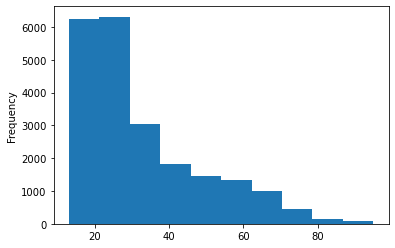

In [32]:
P=0
Indices = []
for index, row in data1.iterrows():
    if ((row['likes']==0) and (row['mobile_likes']==0)) and (row['www_likes']==0):
        P=P+1       #(P is total count of inactive user in data representation.)
        Indices.append(index)

data2=data1.loc[Indices]
data2.age.plot(kind='hist')
print("InactiveUsers:",P)

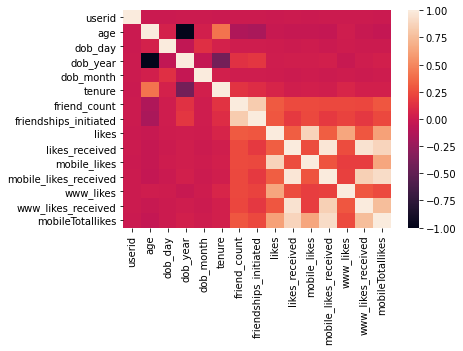

In [33]:
import seaborn as sns
sns.heatmap(data1.corr(method='pearson'))